Дата: 14.09.2025

Автор: Воротницкая Мария

## 1. Загрузка данных и их предобработка

Загрузите данные и получите первую информацию о них. Проведите необходимую предобработку. Основную информацию о данных и этапы предобработки зафиксируйте в кратком промежуточном выводе.

In [1]:
# Загрузка необходимых библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# Путь к датасетам
data = pd.read_csv('https://code.s3.yandex.net/datasets/insides_data.csv')

# Общая информация
data_info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205510 entries, 0 to 205509
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   visitor_uuid  205510 non-null  object 
 1   user_id       205510 non-null  float64
 2   device_type   205510 non-null  object 
 3   city_id       205510 non-null  int64  
 4   source        205510 non-null  object 
 5   first_date    205510 non-null  object 
 6   visit_id      205510 non-null  int64  
 7   event         205510 non-null  object 
 8   datetime      205510 non-null  object 
 9   rest_id       166915 non-null  object 
 10  object_id     21308 non-null   float64
 11  order_id      7008 non-null    float64
 12  revenue       7008 non-null    float64
 13  delivery      7008 non-null    float64
 14  commission    21308 non-null   float64
dtypes: float64(6), int64(2), object(7)
memory usage: 23.5+ MB


Из полученных данных видно следующее: в датасете всего 205510 строк и 15 столбцов. В столбцах visitor_uuid, device_type, city_id, source, event не наблюдаются пропуски или неверные типы данных, однако стоит на всякий случай убедиться, что visitor_uuid может быть строкой по данным. Столбец user_id заполнен полностью, но хранится как float64 (видимо, из-за NaN при экспорте), скорее всего стоит привести к Int64. В столбцах first_date и datetime нужно изменить тип данных со строки на временной.

Столбцы rest_id (166915), object_id (21308), order_id, revenue, delivery (7008), commission (21308) только частично заполнены, стоит проследить взаимосвязь пропусков. Также проверим данный датасет на наличие дубликатов и аномалий.

In [3]:
#Преобразуем даты
data['first_date'] = pd.to_datetime(data['first_date'])
data['datetime'] = pd.to_datetime(data['datetime'])

data['user_id'] = data['user_id'].astype('Int64')
data['order_id'] = data['order_id'].astype('Int64')

In [4]:
#Выведем первые 20 строк
data.head(20)

,visitor_uuid,user_id,device_type,city_id,source,first_date,visit_id,event,datetime,rest_id,object_id,order_id,revenue,delivery,commission
0,01b5da38-3022-48ff-87c0-5519247fef1b,567317,Desktop,6,Source_B,2021-05-01,171481813,authorization,2021-05-01 16:07:53,NaN,NaN,<NA>,NaN,NaN,NaN
1,01b5da38-3022-48ff-87c0-5519247fef1b,567317,Desktop,6,Source_B,2021-05-01,171481813,reg_page,2021-05-01 16:09:16,NaN,NaN,<NA>,NaN,NaN,NaN
2,01b5da38-3022-48ff-87c0-5519247fef1b,567317,Desktop,6,Source_B,2021-05-01,171481813,confirm_phone,2021-05-01 16:09:19,NaN,NaN,<NA>,NaN,NaN,NaN
3,01b5da38-3022-48ff-87c0-5519247fef1b,567317,Desktop,6,Source_B,2021-05-01,171481813,login,2021-05-01 16:09:23,NaN,NaN,<NA>,NaN,NaN,NaN
4,01b5da38-3022-48ff-87c0-5519247fef1b,567317,Desktop,6,Source_B,2021-05-01,171481813,main_page,2021-05-01 16:09:34,2c6095730b514c189ee41c65f03febc3,NaN,<NA>,NaN,NaN,NaN
5,01b5da38-3022-48ff-87c0-5519247fef1b,567317,Desktop,6,Source_B,2021-05-01,171481813,main_page,2021-05-01 16:09:40,2c6095730b514c189ee41c65f03febc3,NaN,<NA>,NaN,NaN,NaN
6,01b5da38-3022-48ff-87c0-5519247fef1b,567317,Desktop,6,Source_B,2021-05-01,171481813,main_page,2021-05-01 16:09:50,1be5a933aab34fbab594bebba48e976e,NaN,<NA>,NaN,NaN,NaN
7,01b5da38-3022-48ff-87c0-5519247fef1b,567317,Desktop,6,Source_B,2021-05-01,171481813,main_page,2021-05-01 16:10:04,39b7eab4f4704ed2886fafe171489960,NaN,<NA>,NaN,NaN,NaN
8,01b5da38-3022-48ff-87c0-5519247fef1b,567317,Desktop,6,Source_B,2021-05-01,171481813,main_page,2021-05-01 16:10:12,39b7eab4f4704ed2886fafe171489960,NaN,<NA>,NaN,NaN,NaN
9,01b5da38-3022-48ff-87c0-5519247fef1b,567317,Desktop,6,Source_B,2021-05-01,171481813,main_page,2021-05-01 16:10:28,55d6470712ee48e98509478ad6aa18ee,NaN,<NA>,NaN,NaN,NaN


Видно, что пропуски в датасете логически обусловлены. Столбец rest_id заполнен только когда действие связано с рестораном, object_id появляется только в карточках блюд и заказах, order_id, revenue, delivery только для заказов, а commission заполняется только там, где есть ресторан/блюдо. То есть это скорее разные уровни детализации событий. Теперь займёмся типом данных некоторых столбцов.

In [5]:
#Проверка на дубликаты
data.duplicated().sum()

# Проверка на неявные дубликаты (по ключевым полям)
duplicates = data.duplicated(subset=['user_id', 'datetime', 'event']).sum()
print(f"Количество неявных дубликатов: {duplicates}")

# Проверим количество уникальных пользователей и ресторанов
unique_users = data['user_id'].nunique()
unique_restaurants = data['rest_id'].nunique()
print(f"Уникальных пользователей: {unique_users}")
print(f"Уникальных ресторанов: {unique_restaurants}")

# Проверим уникальные заказы и блюда
unique_orders = data['order_id'].nunique()
unique_dishes = data['object_id'].nunique()
print(f"Уникальных заказов: {unique_orders}")
print(f"Уникальных блюд: {unique_dishes}")

# Проверим период данных
date_min = data['datetime'].min()
date_max = data['datetime'].max()
print(f"Данные представлены за период: {date_min} — {date_max}")

Количество неявных дубликатов: 7
Уникальных пользователей: 8473
Уникальных ресторанов: 21
Уникальных заказов: 4443
Уникальных блюд: 603
Данные представлены за период: 2021-05-01 00:10:55 — 2021-07-02 00:12:08


In [6]:
# Удалим неявные дубликаты
data = data.drop_duplicates(subset=['user_id','datetime','event'])

На данный момент можно утверждать, что предобработка данных выполнена хорошо, так как мы привели к нужному типу все данные и выполнили нужную проверку на "грязные" пропуски и дубликаты.

---

## 2. Анализ пользовательского пути

Маркетологи стали замечать следующее: деньги на рекламу по-прежнему тратятся, а заказов стало меньше. И это несмотря на то, что приложение скачивается и устанавливается так же активно, как раньше. Складывается ощущение, что пользователи где-то теряются. При этом доля заказов с десктопной версии приложения увеличилась по сравнению с мобильной.

Разработчики говорят, что последние обновления мобильной версии приложения не должны были повлиять на каталог блюд или его выбор для заказа и последующей оплаты доставки, так как изменения касались нового алгоритма подтверждения мобильного телефона и адреса доставки.

С помощью воронок изучите общий пользовательский путь новых пользователей, затем сравните поведение пользователей мобильной и десктопной версий приложения. 

**Задача 2.1.** Постройте и визуализируйте общую воронку (по всем данным), затем опишите пользовательский путь: какие этапы представлены, какова их последовательность, на каком (или на каких) этапах теряется большая часть новых пользователей.
    
При решении постройте две воронки: 
- **классическую воронку** — доля от первого шага в процентах
- **step-by-step** — с конверсией от предыдущего этапа.

Предполагается, что пользователь проходит такой путь к оформлению доставки блюда из ресторанов:
1. `authorization` — авторизация пользователя — запуск приложения.
2. `main_page` — загрузка основной страницы приложения.
2. `reg_page` — переход на страницу регистрации.
2. `confirm_phone` — подтверждение телефона (окончание процесса регистрации).
2. `object_page` — страница блюда.
2. `add_to_cart` — переход в корзину.
2. `order` — оформление заказа.    

In [7]:
# Отбор шагов воронки
steps = ['authorization', 'main_page', 'reg_page', 'confirm_phone', 'object_page', 'add_to_cart', 'order']

# Отбор новых пользователей
first_event_date = data.groupby('visitor_uuid')['datetime'].min().dt.date.rename('first_event_date')
first_date_per_visitor = data.groupby('visitor_uuid')['first_date'].first().rename('first_date')
visitors = pd.concat([first_event_date, first_date_per_visitor], axis=1)
visitors['is_new'] = visitors['first_event_date'] == visitors['first_date']
new_visitors = visitors[visitors['is_new']].index.tolist()

data_new = data[data['visitor_uuid'].isin(new_visitors)].copy()

# Формируем таблицу событий
ev = (data_new[data_new['event'].isin(steps)]
      .sort_values('datetime')
      .groupby(['visitor_uuid','event'])['datetime']
      .min()
      .unstack(fill_value=pd.NaT))

for s in steps:
    if s not in ev.columns:
        ev[s] = pd.NaT
ev = ev[steps]

Общая воронка (новые пользователи):


,count,classic_%,step_%
authorization,6931,100.00,NaN
main_page,6068,87.55,87.55
reg_page,5649,81.50,93.09
confirm_phone,4347,62.72,76.95
object_page,2946,42.50,67.77
add_to_cart,2223,32.07,75.46
order,1795,25.90,80.75


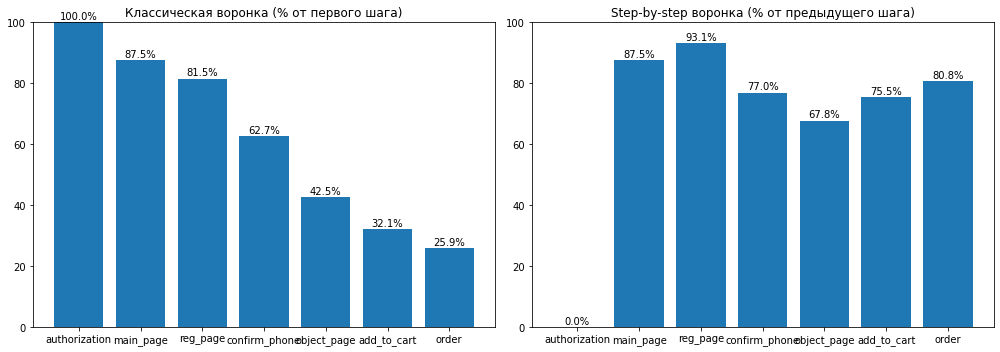

In [8]:
# Считаем воронку
def funnel_counts(ev_df, steps):
    counts = {}
    for step in steps:
        counts[step] = ev_df[step].notna().sum()
    return pd.Series(counts)

# Количество пользователей на каждом шаге
counts = funnel_counts(ev, steps)

# Таблица с метриками
funnel = pd.DataFrame(index=steps)
funnel['count'] = counts
funnel['classic_%'] = funnel['count'] / funnel['count'].iloc[0] * 100
funnel['step_%'] = funnel['count'] / funnel['count'].shift(1) * 100
funnel = funnel.round(2)

print("Общая воронка (новые пользователи):")
display(funnel)

# Визуализация
fig, axes = plt.subplots(1, 2, figsize=(14,5))

# Классическая воронка
axes[0].bar(funnel.index, funnel['classic_%'])
axes[0].set_ylim(0, 100)
axes[0].set_title('Классическая воронка (% от первого шага)')
for i, v in enumerate(funnel['classic_%']):
    axes[0].text(i, v + 1, f"{v:.1f}%", ha='center')

# Step-by-step воронка
axes[1].bar(funnel.index, funnel['step_%'].fillna(0))
axes[1].set_ylim(0, 100)
axes[1].set_title('Step-by-step воронка (% от предыдущего шага)')
for i, v in enumerate(funnel['step_%'].fillna(0)):
    axes[1].text(i, v + 1, f"{v:.1f}%", ha='center')

plt.tight_layout()
plt.show()

По полученным воронкам видно, что присутствует огромный отток пользователей приходится на этап регистрации и подтверждения телефона. Несмотря на то, что 26% новых пользователей доходят до заказа, именно процесс верификации выглядит язвимым местом. Это связано с последними изменениями в алгоритме подтверждения мобильного телефона и адреса доставки.

**Задача 2.2.** Сравните пользовательский путь в двух приложениях: в мобильной версии и десктопной. Для этого постройте и визуализируйте **две воронки step-by-step**: для новых пользователей **мобильной** и **десктопной** версий приложения.
    
Сравните результаты между собой и проанализируйте, есть ли различия в пользовательском пути для различных приложений. Результаты сравнения опишите в небольшом **промежуточном выводе**.

In [9]:
first_device = data_new.sort_values('datetime').groupby('visitor_uuid')['device_type'].first().rename('first_device')
ev = (data_new[data_new['event'].isin(steps)]
       .sort_values('datetime')
       .groupby(['visitor_uuid','event'])['datetime']
       .min()
       .unstack(fill_value=pd.NaT))
 
for s in steps:
    if s not in ev.columns:
        ev[s] = pd.NaT
        ev = ev[steps]

# --- Функция простого подсчёта (наличие события, без строгого порядка) ---
def counts_by_step(ev_df, steps):
    return ev_df[steps].notna().sum()

# --- Считаем для каждого устройства ---
devices_to_compare = [d for d in ['Desktop','Mobile'] if d in first_device.unique().tolist()]
counts_by_device = {}
step_pct_by_device = {}

for dev in devices_to_compare:
    uids = first_device[first_device == dev].index
    ev_sub = ev.reindex(uids).fillna(pd.NaT)

    # абсолютные числа: сколько пользователей имеют событие
    counts = counts_by_step(ev_sub, steps)
    counts_by_device[dev] = counts

    # step-by-step: доля тех, у кого есть и prev и cur, от числа тех, у кого есть prev
    step_pct = []
    for i, cur in enumerate(steps):
        if i == 0:
            step_pct.append(np.nan)
            continue
        prev = steps[i-1]
        prev_mask_sum = ev_sub[prev].notna().sum()
        both_sum = (ev_sub[prev].notna() & ev_sub[cur].notna()).sum()
        pct = (both_sum / prev_mask_sum * 100) if prev_mask_sum > 0 else np.nan
        step_pct.append(round(pct, 2))
    step_pct_by_device[dev] = step_pct

# Собираем DataFrame'ы для вывода
counts_df = pd.DataFrame(counts_by_device).astype(int)
step_pct_df = pd.DataFrame(step_pct_by_device, index=steps).round(2)

Абсолютные числа:


,Desktop,Mobile
event,,
authorization,4305,2626
main_page,3882,2186
reg_page,3546,2103
confirm_phone,3197,1150
object_page,2246,700
add_to_cart,1651,572
order,1315,480



Step-by-step конверсия (%):


,Desktop,Mobile
authorization,NaN,NaN
main_page,82.07,76.09
reg_page,73.47,69.85
confirm_phone,89.59,54.59
object_page,64.06,47.39
add_to_cart,57.70,53.14
order,61.66,60.31



Количество пользователей с событием 'order' по устройствам:
Desktop    1315
Mobile      480
Name: order, dtype: int64


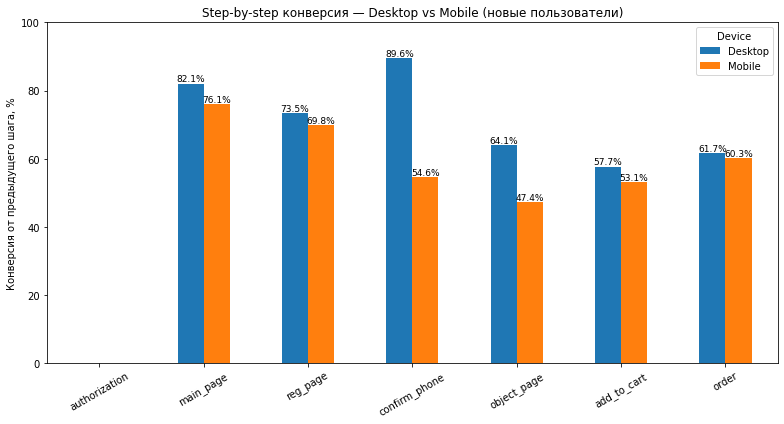

In [10]:
print("Абсолютные числа:")
display(counts_df)

print("\nStep-by-step конверсия (%):")
display(step_pct_df)
print("\nКоличество пользователей с событием 'order' по устройствам:")
print(counts_df.loc['order'])

fig, ax = plt.subplots(figsize=(11,6))
step_pct_df.plot(kind='bar', ax=ax)
ax.set_ylabel('Конверсия от предыдущего шага, %')
ax.set_ylim(0, 100)
ax.set_title('Step-by-step конверсия — Desktop vs Mobile (новые пользователи)')
ax.legend(title='Device')
plt.xticks(rotation=30)

for p in ax.patches:
    height = p.get_height()
    if not np.isnan(height) and height > 0:
        ax.annotate(f'{height:.1f}%',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

Ключевая проблема мобильного приложения — это резкий провал на этапе верификации мобильного телефона. После регистрации мобильные пользователи теряются заметно сильнее: хуже переходят к просмотру блюд, реже добавляют их в корзину и оформляют заказ.

В результате — из 2626 новых мобильных пользователей заказ сделали 480 человек, а из 4305 десктопных — 1315 человек. Это подтверждает наблюдения маркетологов: мобильные пользователи активно скачивают приложение, но пропадают на регистрации, что приводит к существенному снижению количества заказов.

---

## 3. RFM сегментация

У сервиса доставки еды не такое высокое удержание пользователей: в первый день возвращается около 14% посетителей, а на седьмой день и того меньше — около 4–5%. Маркетологи хотят запустить несколько рекламных кампаний, направленных на удержание платящих пользователей и их возврат в сервис, если они давно не совершали заказы.

Для этого необходимо сегментировать пользователей на различные поведенческие сегменты с помощью RFM-сегментации по трём показателям: 
- **давность** (Recency), 
- **частота покупок** (Frequency), 
- **сумма трат** (Monetary).

В качестве даты анализа установите **03 июля 2021 года**.

**Задача 3.1.** Для каждого покупателя посчитайте:
- количество дней с последней покупки — давность (R);
- частоту покупок (F);
- стоимость всех покупок — сумму трат (M).
    
В качестве даты анализа установите **03 июля 2021 года**. После этого постройте три гистограммы и проанализируйте их.

In [11]:
# Дата анализа
analysis_date = pd.to_datetime("2021-07-03")

# Берём только событие оформления заказа
orders = data[data['event'] == 'order'].copy()

# RFM-группировка
rfm = (orders.groupby('user_id')
              .agg({
                  'datetime': lambda x: (analysis_date - x.max()).days,  # давность
                  'order_id': 'nunique',  # уникальные заказы
                  'revenue': 'sum'        # суммарный доход
              })
              .rename(columns={'datetime': 'Recency',
                               'order_id': 'Frequency',
                               'revenue': 'Monetary'}))

rfm.head()

,Recency,Frequency,Monetary
user_id,,,
5506,32,2,3752.00
6291,57,1,1750.00
6820,41,1,1260.14
11062,57,1,3785.60
13254,54,1,553.00


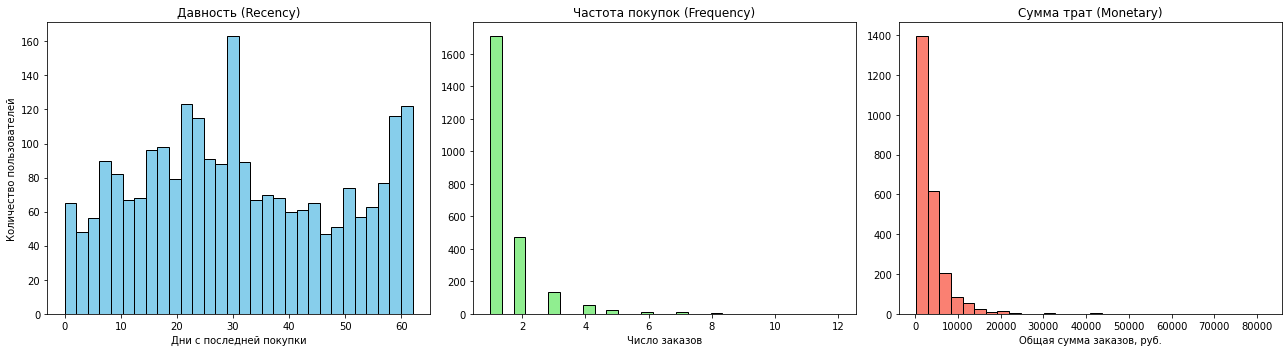

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].hist(rfm['Recency'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Давность (Recency)')
axes[0].set_xlabel('Дни с последней покупки')
axes[0].set_ylabel('Количество пользователей')

axes[1].hist(rfm['Frequency'], bins=30, color='lightgreen', edgecolor='black')
axes[1].set_title('Частота покупок (Frequency)')
axes[1].set_xlabel('Число заказов')

axes[2].hist(rfm['Monetary'], bins=30, color='salmon', edgecolor='black')
axes[2].set_title('Сумма трат (Monetary)')
axes[2].set_xlabel('Общая сумма заказов, руб.')

plt.tight_layout()
plt.show()

По полученным результатам видно, что у сервиса проблемы с удержанием: много разовых покупателей, постоянные пользователи есть, но они быстро перестают возвращаться.

**Задача 3.2.** Выделите **RFM-сегменты** и изучите распределение пользователей по ним.
    
Примените следующие подходы к выделению RFM сегментов:
- **Recency** — разделите на три равные группы.
- **Frequency** —  разделите на три группы: 
    - пользователи с 1 заказом (F-сегмент с небольшим количеством заказов);
    - пользователи с 2 заказами (F-сегмент со средним количеством заказов);
    - пользователи с 3 и более заказами (F-сегмент с большим количеством заказов).
- **Monetary** — разделите на три группы по 33-му и 66-му перцентилям.
    
После этого посчитайте количество покупателей в каждом сегменте, сделайте промежуточные выводы и напишите рекомендации.

In [13]:
rfm_seg = rfm.copy()
recency_min = rfm_seg['Recency'].min()
recency_max = rfm_seg['Recency'].max()
interval = (recency_max - recency_min) / 3
recency_bins = [recency_min, recency_min + interval, recency_min + 2*interval, recency_max]

rfm_seg['R_score'] = pd.cut(rfm_seg['Recency'], bins=recency_bins, labels=[3, 2, 1], include_lowest=True)

def f_segment(x):
    if x == 1:
        return 1
    elif x == 2:
        return 2
    else:
        return 3

rfm_seg['F_score'] = rfm_seg['Frequency'].apply(f_segment)

m_bins = rfm_seg['Monetary'].quantile([0, 0.33, 0.66, 1]).values
rfm_seg['M_score'] = pd.cut(rfm_seg['Monetary'], bins=m_bins, labels=[1, 2, 3], include_lowest=True)

rfm_seg['RFM_segment'] = (
    rfm_seg['R_score'].astype(str) + 
    rfm_seg['F_score'].astype(str) + 
    rfm_seg['M_score'].astype(str)
)

rfm_seg.head()


,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_segment
user_id,,,,,,,
5506,32,2,3752.00,2,2,3,223
6291,57,1,1750.00,1,1,1,111
6820,41,1,1260.14,2,1,1,211
11062,57,1,3785.60,1,1,3,113
13254,54,1,553.00,1,1,1,111


In [14]:
# Код ревьюера:
display(rfm_seg.groupby('Recency')['Recency'].max())

# Рассчитаем три равных интервала:
(rfm_seg['Recency'].max() - rfm_seg['Recency'].min())  / 3

Recency
0      0
1      1
2      2
3      3
4      4
      ..
58    58
59    59
60    60
61    61
62    62
Name: Recency, Length: 63, dtype: int64

20.666666666666668

In [15]:
print("Распределение по Recency:")
print(rfm_seg['R_score'].value_counts().sort_index())

print("\nРаспределение по Frequency:")
print(rfm_seg['F_score'].value_counts().sort_index())

print("\nРаспределение по Monetary:")
print(rfm_seg['M_score'].value_counts().sort_index())

seg_counts = rfm_seg['RFM_segment'].value_counts()
print("\nТоп-10 RFM-сегментов:")
print(seg_counts.head(10))

Распределение по Recency:
3    749
2    934
1    733
Name: R_score, dtype: int64

Распределение по Frequency:
1    1709
2     473
3     234
Name: F_score, dtype: int64

Распределение по Monetary:
1    800
2    794
3    822
Name: M_score, dtype: int64

Топ-10 RFM-сегментов:
211    280
311    244
111    244
212    234
112    210
312    185
213    126
223    119
233    105
313    102
Name: RFM_segment, dtype: int64


В итоге видно, что большинство клиентов сделали только один заказ, при этом часть из них приносит средний или высокий доход.

Рекомендации по сегментам.
- Сегменты с 1 заказом (F=1): Мотивировать на повторную покупку: email-кампании, акции, скидки на второй заказ. Для клиентов с высоким чеком (M=3) можно ввести персональные предложения, upsell.

- Сегменты с 2–3 заказами (F=2-3): Стимулировать увеличение LTV через кросс-продажи и программы лояльности. Для средних и высоких чеков (M=2-3) предложить VIP-предложения, премиальные подписки.

- Сегменты с низкой активностью (R=1-2): Реанимация «спящих» клиентов через персональные письма, ремаркетинг и бонусы.

- Сегменты свежих клиентов (R=3): Фокус на удержание, повторные покупки, бонусы за регистрацию и первый повторный заказ.

---

## 4. K-Means кластеризация

Чтобы лучше понимать поведение ресторанов и предлагать им персонализированные условия сотрудничества, а также создавать персонализированные предложения для пользователей, маркетологи запросили кластеризацию ресторанов по следующим параметрам:
- общее количество заказов;
- средняя стоимость заказа;
- общее число заказанных уникальных блюд (ассортимент ресторана).

С помощью метода K-Means разделите рестораны на кластеры, отражающие различные модели работы и целевые сегменты. Это позволяет выделить группы ресторанов с похожими характеристиками и разрабатывать для них эффективные маркетинговые стратегии.

**Задача 4.1.** Подготовьте данные для кластеризации и для каждого ресторана подсчитайте:
- общее количество заказов;
- средняя стоимость заказа;
- общее число заказанных уникальных блюд (ассортимент ресторана).

In [16]:
orders = data[data['event'] == 'order'].copy()

# Группировка по ресторанам
rest_stats = orders.groupby('rest_id').agg({
    'order_id': 'nunique',
    'revenue': 'mean',
    'object_id': 'nunique'
}).reset_index()

rest_stats = rest_stats.rename(columns={
    'order_id': 'total_orders',
    'revenue': 'avg_order_value',
    'object_id': 'unique_dishes'
})

rest_stats.head()

,rest_id,total_orders,avg_order_value,unique_dishes
0,1be5a933aab34fbab594bebba48e976e,144,2260.180222,28
1,1d6bb74687104fa1953924c9684fe624,108,2959.256481,19
2,2c6095730b514c189ee41c65f03febc3,8,1673.000000,4
3,3247a3b5f9494812a3c1a73c5b61f004,33,2777.209697,4
4,39b7eab4f4704ed2886fafe171489960,33,2011.269697,5


На данном этапе уже видно, что рестораны можно разделить на некоторые сегменты: популярные, малопопулярные, дорогие и средние, с широким или узким ассортиментом.

**Задача 4.2.** Нормализуйте данные и найдите оптимальное количество кластеров, использовав метод `.inertia_`. Постройте график зависимости инерции от числа кластеров (метод «локтя») и предположите оптимальное количество кластеров.

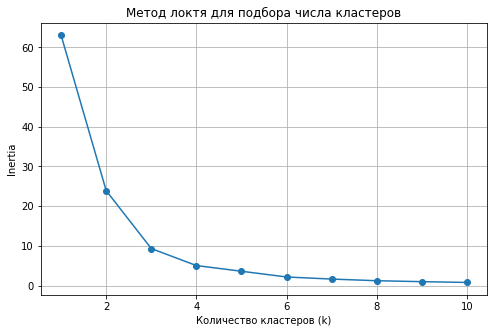

In [17]:
# Берём нужные признаки
X = rest_stats[['total_orders', 'avg_order_value', 'unique_dishes']]

# Нормализация (стандартизация)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Метод локтя
inertia = []
K = range(1, 11)  # проверим k от 1 до 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# График
plt.figure(figsize=(8,5))
plt.plot(K, inertia, marker='o')
plt.xlabel('Количество кластеров (k)')
plt.ylabel('Inertia')
plt.title('Метод локтя для подбора числа кластеров')
plt.grid(True)
plt.show()

Интерпретируя этот график, стоит отметить, что k=3 - базовое и самое логичное количество кластеров в данном случае. Мы можем использовать три сегмента ресторанов. Такие, как популярные, средние, непопулярные.

**Задача 4.3.** Проведите кластеризацию, проанализируйте полученные результаты и рассчитайте средние значения по каждому кластеру.
    
После этого визуализируйте результаты, чтобы проследить зависимость признаков друг от друга. Постройте две визуализации, на которые нанесите все кластеры:
- средний чек в зависимости от количества заказов;
- количество блюд в зависимости от количества заказов.

После этого опишите каждый кластер в промежуточном выводе. 

In [19]:
# Берём данные
X = rest_stats[['total_orders', 'avg_order_value', 'unique_dishes']]

# Нормализация
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans с 3 кластерами
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
rest_stats['cluster'] = kmeans.fit_predict(X_scaled)

# Средние значения по кластерам
cluster_summary = rest_stats.groupby('cluster').agg({
    'total_orders': 'mean',
    'avg_order_value': 'mean',
    'unique_dishes': 'mean',
    'rest_id': 'count'
}).rename(columns={'rest_id': 'restaurants_count'}).reset_index()

print(cluster_summary)

   cluster  total_orders  avg_order_value  unique_dishes  restaurants_count
0        0         69.60      2167.856491              9                 15
1        1       1100.00      2498.828802             83                  2
2        2         76.25      4048.497783              5                  4


Выводы по кластерам:
- Кластер 0 — небольшие рестораны с низким количеством заказов. Для роста стоит стимулировать увеличение числа заказов через акции, скидки или маркетинговые кампании.

- Кластер 1 — топ-рестораны с большим объёмом продаж и широким ассортиментом.

- Кластер 2 — рестораны с высоким чеком и ограниченным меню. Конкретно их ценность в среднем чеке.

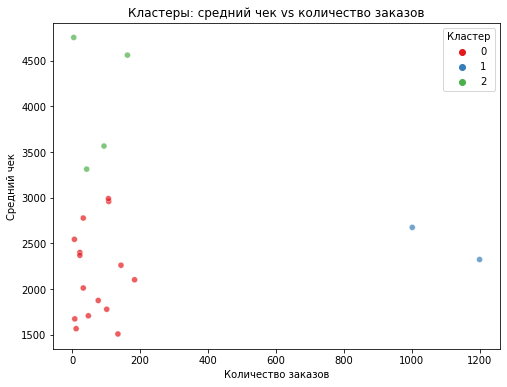

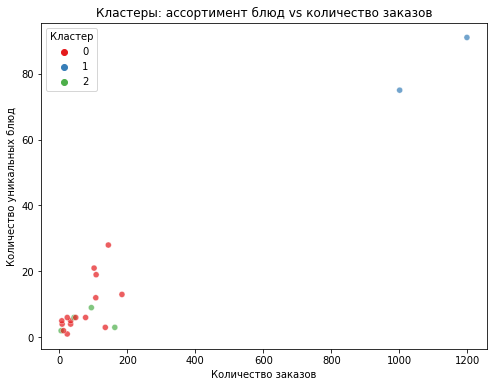

In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=rest_stats, x='total_orders', y='avg_order_value',
                hue='cluster', palette='Set1', alpha=0.7)
plt.title('Кластеры: средний чек vs количество заказов')
plt.xlabel('Количество заказов')
plt.ylabel('Средний чек')
plt.legend(title='Кластер')
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(data=rest_stats, x='total_orders', y='unique_dishes',
                hue='cluster', palette='Set1', alpha=0.7)
plt.title('Кластеры: ассортимент блюд vs количество заказов')
plt.xlabel('Количество заказов')
plt.ylabel('Количество уникальных блюд')
plt.legend(title='Кластер')
plt.show()

По полученным данным можно сделать вывод, что сервис работает в основном за счёт немногих популярных ресторанов, у которых широкий ассортимент и много заказов. Есть также премиальные рестораны, у которых высокая цена и ограниченный ассортимент. Большинство ресторанов попадают в кластер 0 — низкие показатели по всем метрикам. Возможно, им нужны рекламные продвижения.

---

## 5. Итоговый вывод и рекомендации

Сформулируйте общий вывод. Зафиксируйте основные результаты и инсайты, которые, на ваш взгляд, помогут бизнесу улучшить продукт.

Выводы должны быть краткими и ёмкими, ведь их будут читать ваш заказчик, продуктовый менеджер и продуктовая команда.

На данный момент сервис имеет стабильный поток новых пользователей и заказы от топ-ресторанов, но теряет почти всех новых клиентов на старте и в повторных покупках.

Рекомендации по сегментам:
- Сегменты с 1 заказом (F=1): Мотивировать на повторную покупку: email-кампании, акции, скидки на второй заказ. Для клиентов с высоким чеком (M=3) можно ввести персональные предложения, upsell.

- Сегменты с 2–3 заказами (F=2-3): Стимулировать увеличение LTV через кросс-продажи и программы лояльности. Для средних и высоких чеков (M=2-3) предложить VIP-предложения, премиальные подписки.

- Сегменты с низкой активностью (R=1-2): Реанимация «спящих» клиентов через персональные письма, ремаркетинг и бонусы.

- Сегменты свежих клиентов (R=3): Фокус на удержание, повторные покупки, бонусы за регистрацию и первый повторный заказ.

Вывод по кластеризации:
Как уже говорилось ранее, сервис опирается на небольшое количество ресторанов из кластера 1, у которых очень много заказов и широкий ассортимент, ведь именно они приносят основную выручку. Также есть кластер 2 — рестораны с низким количеством заказов, но очень высоким средним чеком, что указывает на их премиальный сегмент. Однако большинство заведений относятся к кластеру 0: имеют низкий средний чек, небольшой ассортимент и немного заказов. Вероятно, им стоит предложить маркетинговое продвижение или улучшение меню для увеличения активности.

Общая рекомендация: В ближайших улучшениях стоит задуматься об упрощении мобильной регистрации, усиленном удержании клиентов и работой с непопулярными ресторанами.